In [ ]:
#first script, mass transfer from normal distribution of particles

import math
import numpy as np

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Adjust for hydration level
effective_surface_area = total_surface_area * hydration_level

# Calculate concentration of CO2 in the gas phase
C_g = (fraction_CO2 * P_total) / (R * T)

# Calculate concentration of CO2 in the liquid phase using Henry's Law
C_l = C_g / H

# Calculate the mass transfer rate
mass_transfer_rate = k * effective_surface_area * C_g * (1 - 1/H)

print(f"Total surface area of particles in the packed bed reactor: {total_surface_area:.2f} square meters")
print(f"Effective surface area for mass transfer: {effective_surface_area:.2f} square meters")
print(f"Mass transfer rate of CO2 into the packed bed reactor: {mass_transfer_rate:.6f} mol/s")

Total surface area of particles in the packed bed reactor: 336.44 square meters
Effective surface area for mass transfer: 33.64 square meters
Mass transfer rate of CO2 into the packed bed reactor: 0.005429 mol/s


Final concentration of CO2 in the gas phase: 0.000009 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


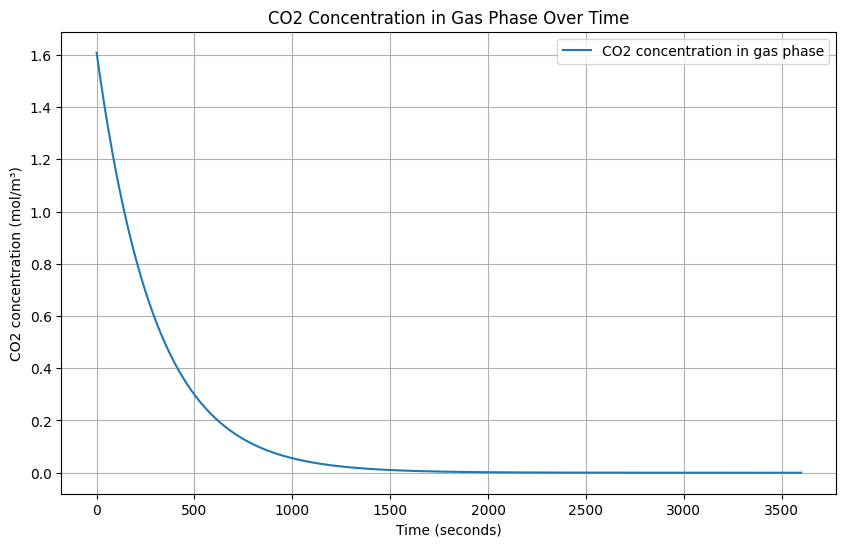

In [ ]:
#third script - mass transfer over time

import math
import numpy as np

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Adjust for hydration level
effective_surface_area = total_surface_area * hydration_level

# Initial concentration of CO2 in the gas phase
C_g_initial = (fraction_CO2 * P_total) / (R * T)

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []

# Initial concentration
C_g = C_g_initial

# Euler method for numerical integration
for t in time_points:
    C_l = C_g / H
    dC_g_dt = -k * effective_surface_area * (C_g - C_l)
    C_g += dC_g_dt * time_step
    C_g_values.append(C_g)

# Print final concentration and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * effective_surface_area * C_g * (1 - 1/H)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Optionally plot the results if you have matplotlib installed
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas Phase Over Time')
plt.legend()
plt.grid(True)
plt.show()

Final concentration of CO2 in the gas phase: 0.000009 mol/m³
Final concentration of CO2 in the liquid phase: 0.000000 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


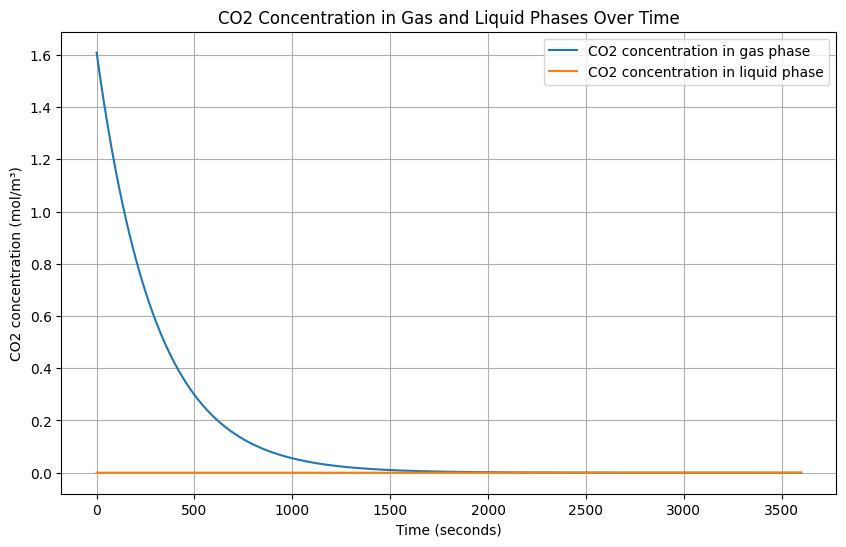

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Adjust for hydration level
effective_surface_area = total_surface_area * hydration_level

# Initial concentration of CO2 in the gas phase
C_g_initial = (fraction_CO2 * P_total) / (R * T)

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []

# Initial concentration
C_g = C_g_initial
C_l = 0  # Initial concentration of CO2 in the liquid phase

# Euler method for numerical integration
for t in time_points:
    C_l_eq = C_g / H  # Equilibrium concentration in the liquid phase
    dC_g_dt = -k * effective_surface_area * (C_g - C_l_eq)
    C_g += dC_g_dt * time_step
    C_l = C_g / H  # Update liquid concentration to maintain equilibrium
    C_g_values.append(C_g)
    C_l_values.append(C_l)

# Print final concentration and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * effective_surface_area * C_g * (1 - 1/H)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Final concentration of CO2 in the gas phase: 0.000009 mol/m³
Final concentration of CO2 in the liquid phase: 1.075775 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


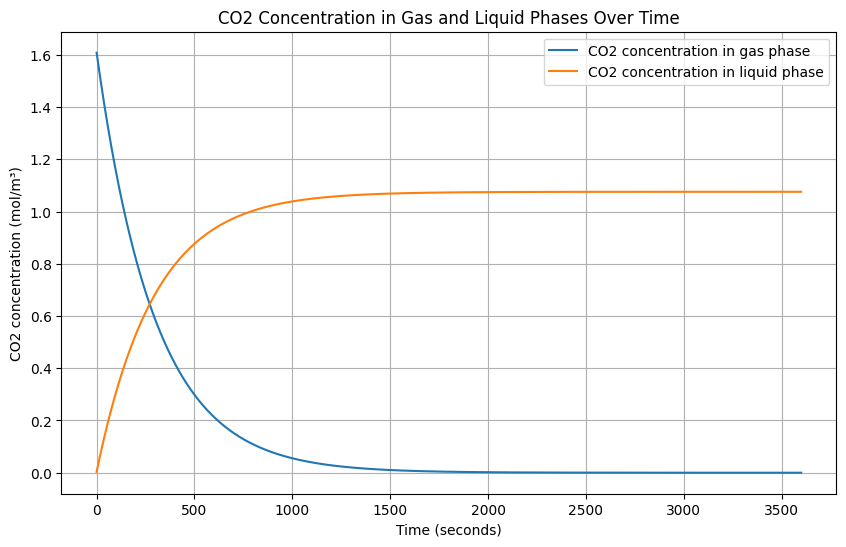

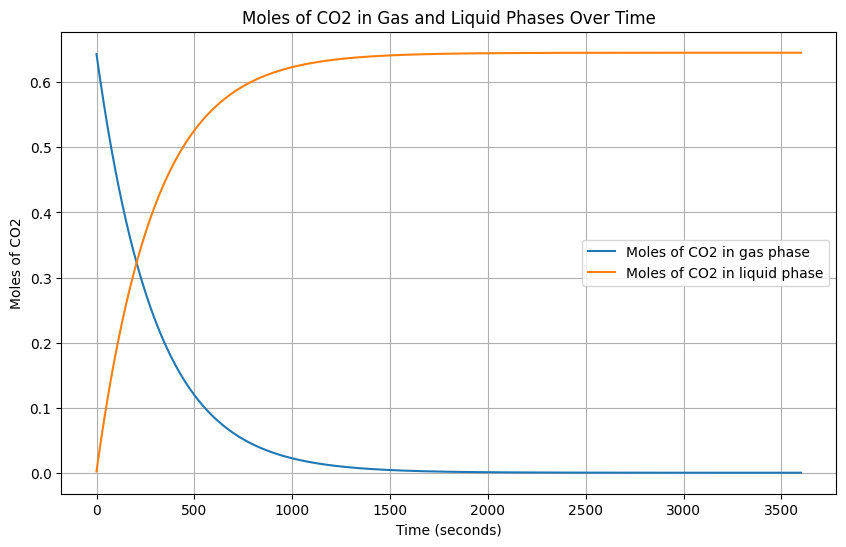

In [ ]:
# 4th - MT conserving number of moles

import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Adjust for hydration level
effective_surface_area = total_surface_area * hydration_level

# Initial concentration of CO2 in the gas phase
C_g_initial = (fraction_CO2 * P_total) / (R * T)
volume_gas = reactor_volume * void_fraction  # Volume of the gas phase
volume_liquid = reactor_volume * (1 - void_fraction)  # Volume of the liquid phase

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * volume_gas

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = 0  # Initial concentration of CO2 in the liquid phase
n_CO2_gas = n_CO2_initial
n_CO2_liquid = 0

# Euler method for numerical integration
for t in time_points:
    # Calculate the equilibrium concentration in the liquid phase
    C_l_eq = C_g / H

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * effective_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Update the moles of CO2 in the gas and liquid phases
    n_CO2_gas = C_g * volume_gas
    n_CO2_liquid = (n_CO2_initial - n_CO2_gas)
    C_l = n_CO2_liquid / volume_liquid  # Update liquid concentration

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * effective_surface_area * C_g * (1 - 1/H)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Final concentration of CO2 in the gas phase: 0.000000 mol/m³
Final concentration of CO2 in the liquid phase: 2.868750 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


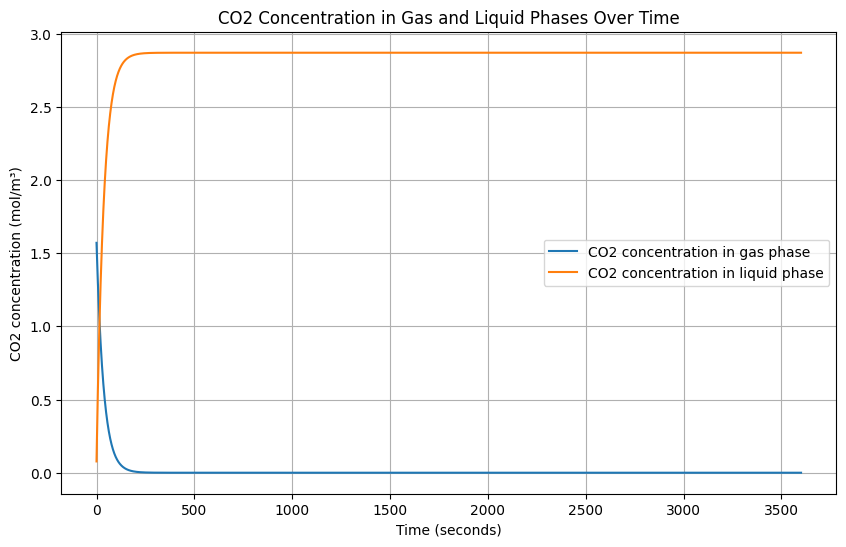

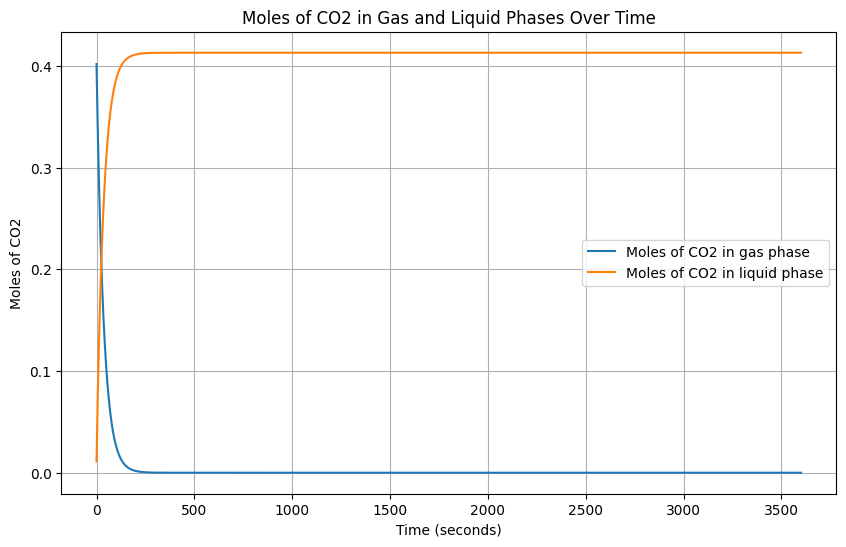

Final concentration of CO2 in the gas phase: 0.000000 mol/m³
Final concentration of CO2 in the liquid phase: 2.868750 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


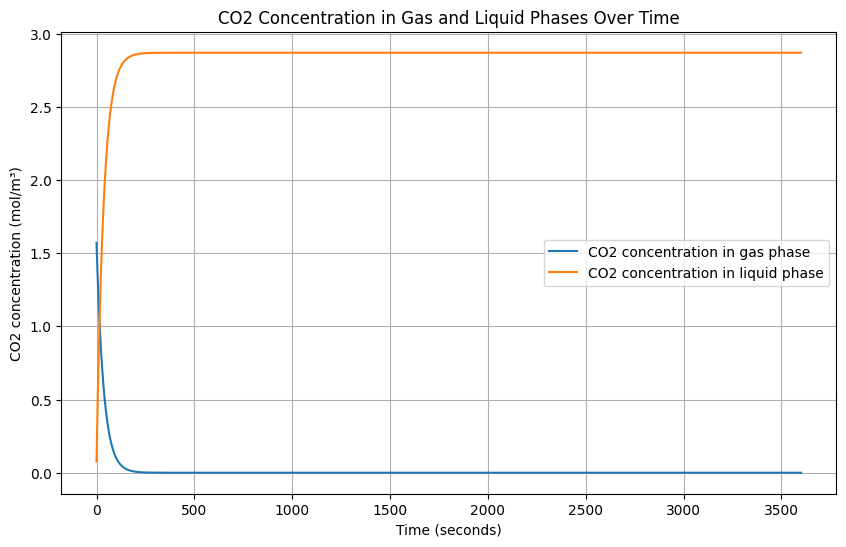

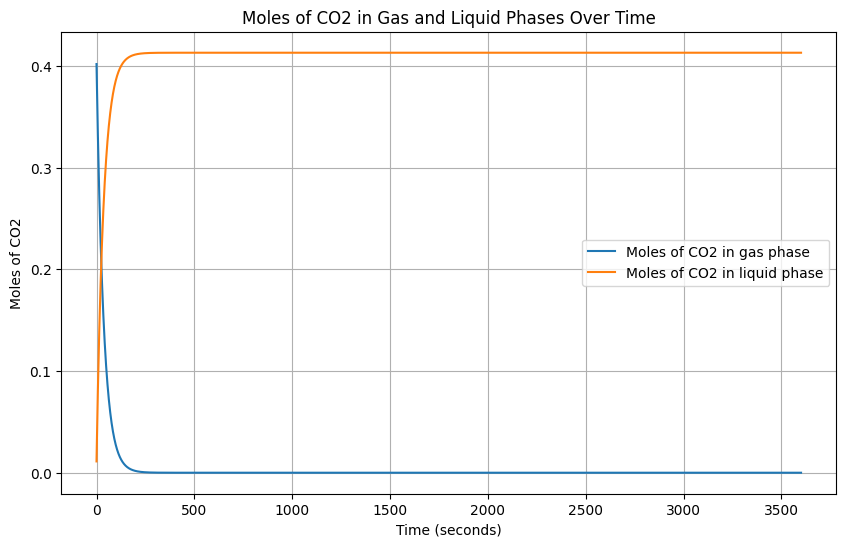

In [ ]:
#5th script - new parameters
#solid phase volume = total volume * (1 - void fraction)
#solid phase mass = solid phase mass * density of concrete
#liquid phase mass  = hydration level * solid phase mass
#liquid phase volume = liquid phase mass * density of water
#gas phase volume = total volume - solid phase - liquid phase
#availbable surface area for gas exchange = solid phase surface area * wetting coefficient taking into account the mass of the liquid phase and the available surface area

import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial concentration of CO2 in the gas phase
C_g_initial = (fraction_CO2 * P_total) / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = 0  # Initial concentration of CO2 in the liquid phase
n_CO2_gas = n_CO2_initial
n_CO2_liquid = 0

# Euler method for numerical integration
for t in time_points:
    # Calculate the equilibrium concentration in the liquid phase
    C_l_eq = C_g / H

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Update the moles of CO2 in the gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = (n_CO2_initial - n_CO2_gas)
    C_l = n_CO2_liquid / liquid_volume  # Update liquid concentration

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * C_g * (1 - 1/H)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial concentration of CO2 in the gas phase
C_g_initial = (fraction_CO2 * P_total) / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = 0  # Initial concentration of CO2 in the liquid phase
n_CO2_gas = n_CO2_initial
n_CO2_liquid = 0

# Euler method for numerical integration
for t in time_points:
    # Calculate the equilibrium concentration in the liquid phase
    C_l_eq = C_g / H

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Update the moles of CO2 in the gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = (n_CO2_initial - n_CO2_gas)
    C_l = n_CO2_liquid / liquid_volume  # Update liquid concentration

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * C_g * (1 - 1/H)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Final concentration of CO2 in the gas phase: 0.000000 mol/m³
Final concentration of CO2 in the liquid phase: 2.868750 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: -0.000003 mol/s


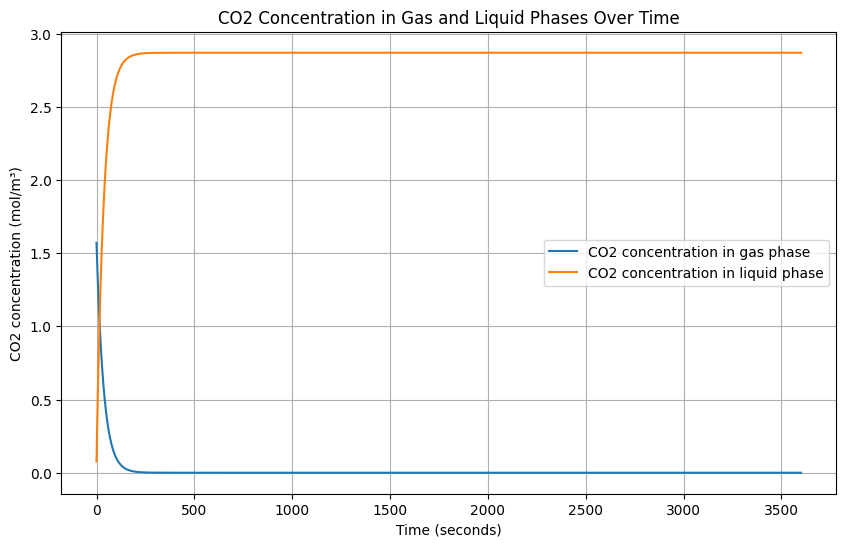

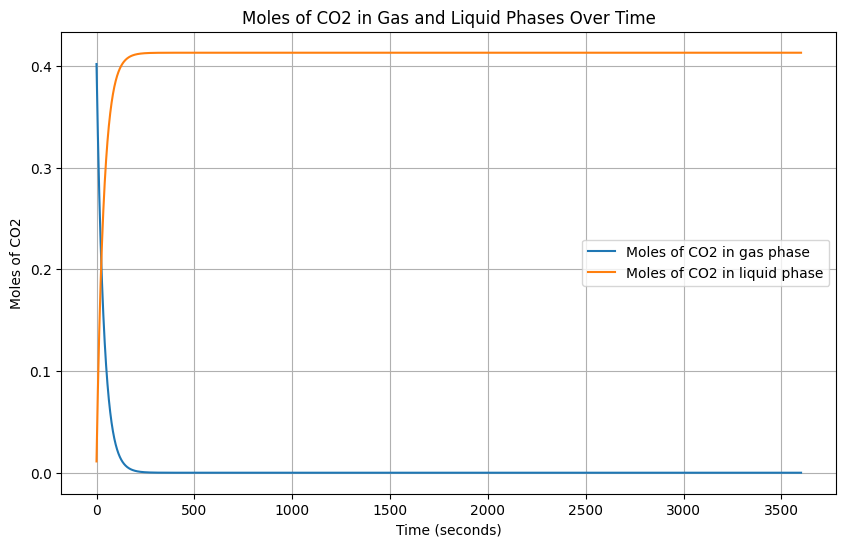

In [ ]:
#6th script - tinkering with eqlibrium position

import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, atm/(mol/m³)
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial concentration of CO2 in the gas phase
C_g_initial = (fraction_CO2 * P_total) / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = 0  # Initial concentration of CO2 in the liquid phase
n_CO2_gas = n_CO2_initial
n_CO2_liquid = 0

# Euler method for numerical integration
for t in time_points:
    # Calculate the equilibrium concentration in the liquid phase
    C_l_eq = C_g / H

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Ensure mass balance: moles of CO2 in gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = n_CO2_initial - n_CO2_gas
    C_l = n_CO2_liquid / liquid_volume

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g - C_l / H)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Final concentration of CO2 in the gas phase: 0.136054 mol/m³
Final concentration of CO2 in the liquid phase: 2.626875 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


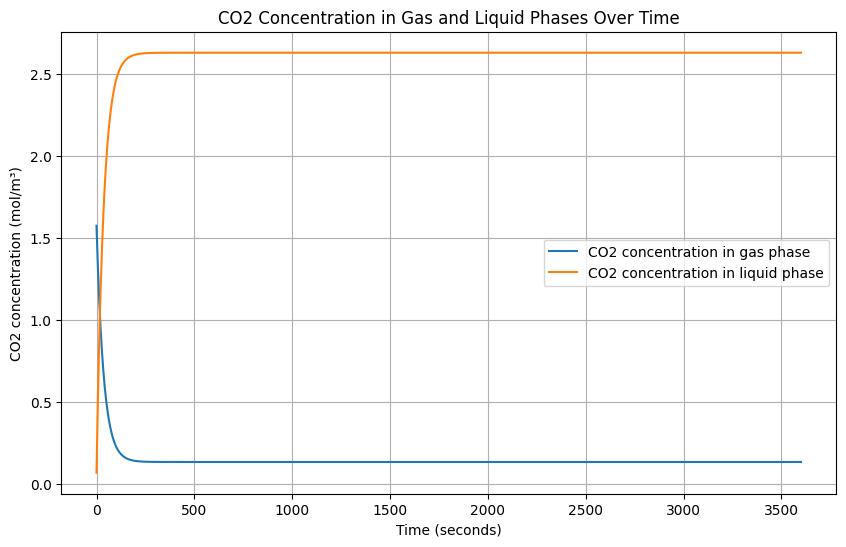

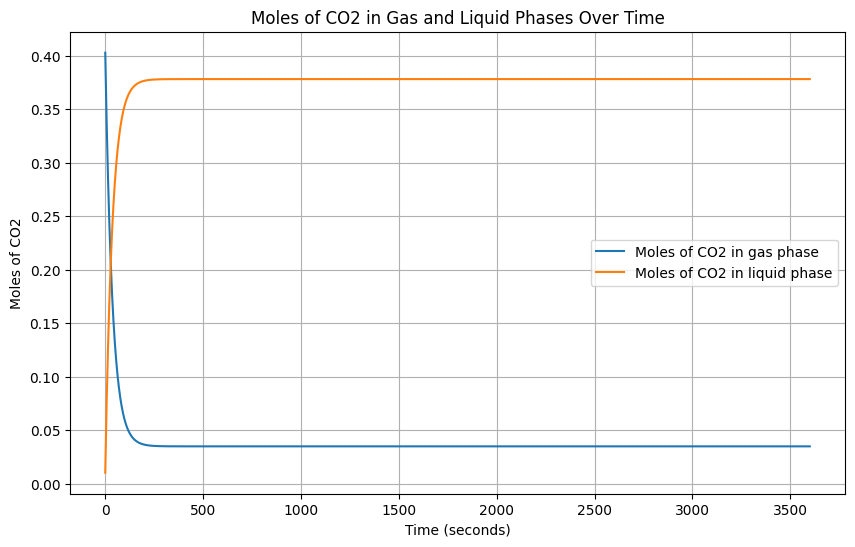

In [ ]:
#7th - with corrected equlib

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, Pa·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial concentration of CO2 in the gas phase
P_CO2 = fraction_CO2 * P_total
C_g_initial = P_CO2 / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = 0  # Initial concentration of CO2 in the liquid phase
n_CO2_gas = n_CO2_initial
n_CO2_liquid = 0

# Calculate equilibrium concentration in the liquid phase using Henry's Law
C_l_eq = P_CO2 / H

# Euler method for numerical integration
for t in time_points:
    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Ensure mass balance: moles of CO2 in gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = n_CO2_initial - n_CO2_gas
    C_l = n_CO2_liquid / liquid_volume

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g - C_l_eq)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Equilibrium concentration of CO2 in the gas phase: 0.136091 mol/m³
Equilibrium concentration of CO2 in the liquid phase: 0.000005 mol/m³
Final concentration of CO2 in the gas phase: 0.136091 mol/m³
Final concentration of CO2 in the liquid phase: 2.626810 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.003663 mol/s


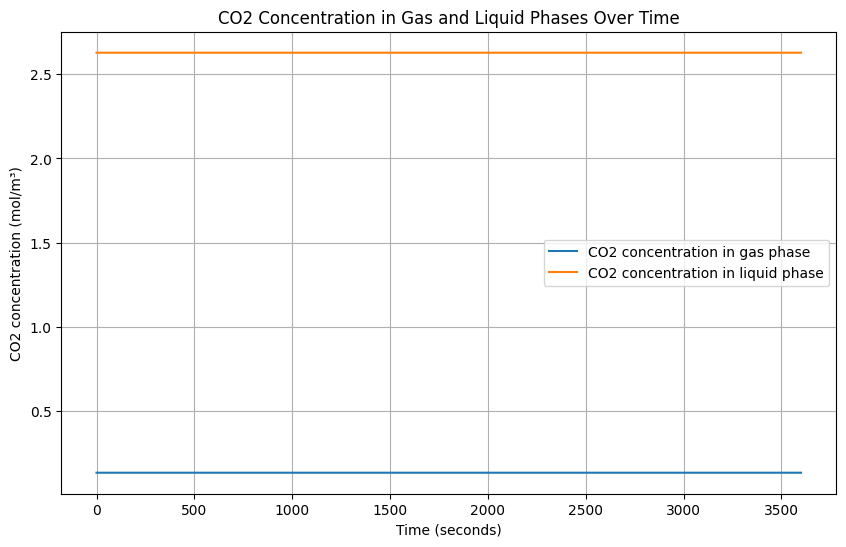

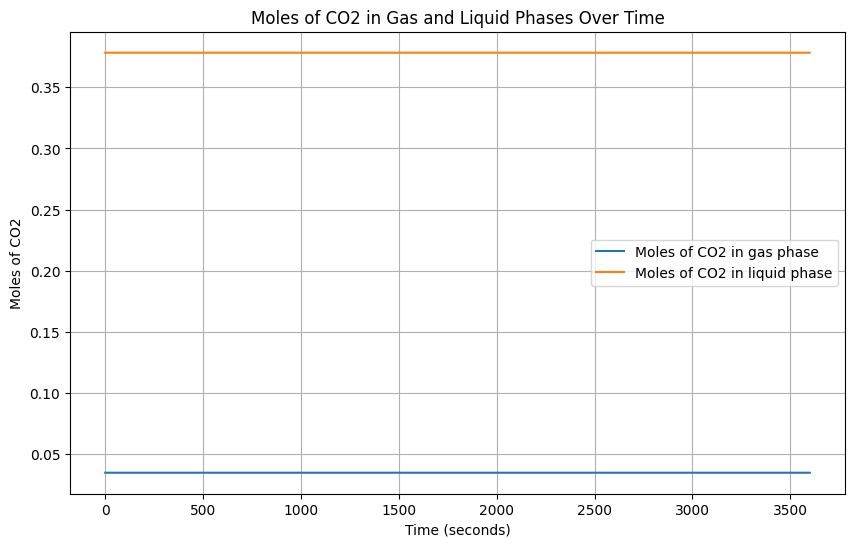

In [ ]:
#8th - more tinkering

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, Pa·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial concentration of CO2 in the gas phase
P_CO2 = fraction_CO2 * P_total
C_g_initial = P_CO2 / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial

# Calculate the equilibrium concentration in the liquid phase using Henry's Law
C_l_eq = P_CO2 / H

# Update the concentration of CO2 in the gas phase to approach equilibrium
while True:
    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    new_C_g = C_g + dC_g_dt * time_step

    # Check if the change in concentration is small (indicating equilibrium)
    if abs(new_C_g - C_g) < 1e-6:
        break

    C_g = new_C_g

# After reaching equilibrium, update the concentration of CO2 in the liquid phase
C_l = C_g / H

# Store equilibrium values
C_g_eq = C_g
C_l_eq = C_l

# Print equilibrium concentrations
print(f"Equilibrium concentration of CO2 in the gas phase: {C_g_eq:.6f} mol/m³")
print(f"Equilibrium concentration of CO2 in the liquid phase: {C_l_eq:.6f} mol/m³")

# Euler method for numerical integration
for t in time_points:
    # Ensure mass balance: moles of CO2 in gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = n_CO2_initial - n_CO2_gas
    C_l = n_CO2_liquid / liquid_volume

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g - C_l_eq)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Final concentration of CO2 in the gas phase: 0.136054 mol/m³
Final concentration of CO2 in the liquid phase: 0.001361 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


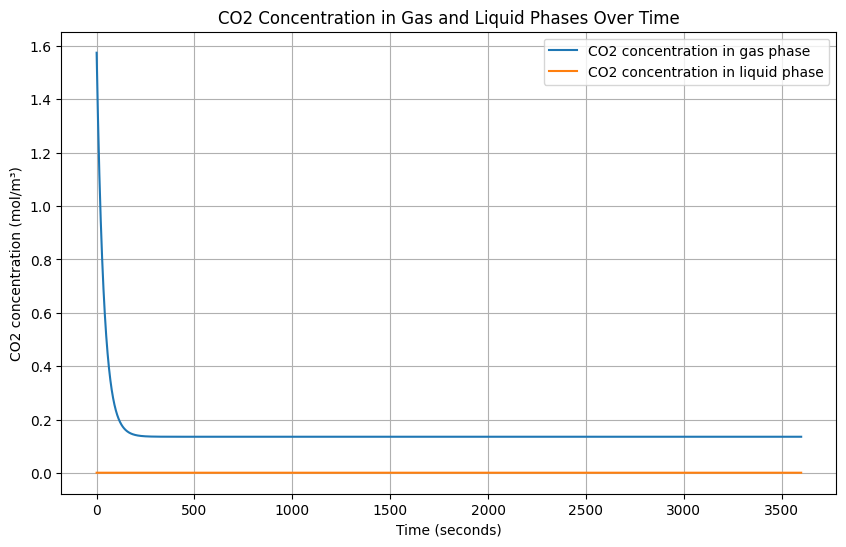

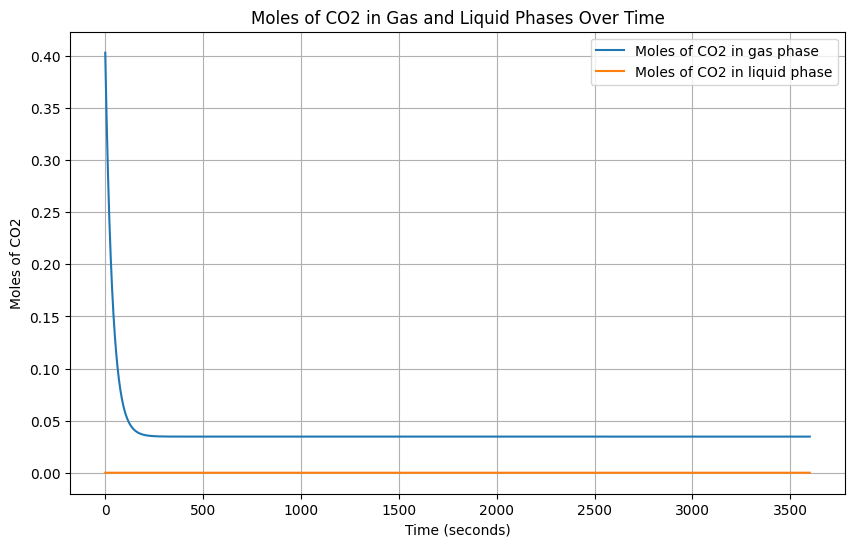

In [ ]:
#9th - initial CO2 in liquid phase added

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, Pa·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Partial pressure of CO2 in the atmosphere (assuming 400 ppm or 0.0004 fractional concentration)
P_CO2_atm = 0.0004 * P_total

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law
C_l_initial = P_CO2_atm / H

# Initial concentration of CO2 in the gas phase
P_CO2 = fraction_CO2 * P_total
C_g_initial = P_CO2 / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = C_l_initial

# Calculate the equilibrium concentration in the liquid phase using Henry's Law
C_l_eq = P_CO2 / H

# Euler method for numerical integration
for t in time_points:
    # Ensure mass balance: moles of CO2 in gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = liquid_volume * C_l

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Update moles of CO2 in gas phase
    n_CO2_gas = C_g * gas_volume

    # Update the concentration of CO2 in the liquid phase
    C_l = n_CO2_liquid / liquid_volume

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g - C_l_eq)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Initial concentration of CO2 in the gas phase: 1.613672 mol/m³
Initial concentration of CO2 in the liquid phase: 0.001361 mol/m³
Final concentration of CO2 in the gas phase: 0.000000 mol/m³
Final concentration of CO2 in the liquid phase: 0.000000 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


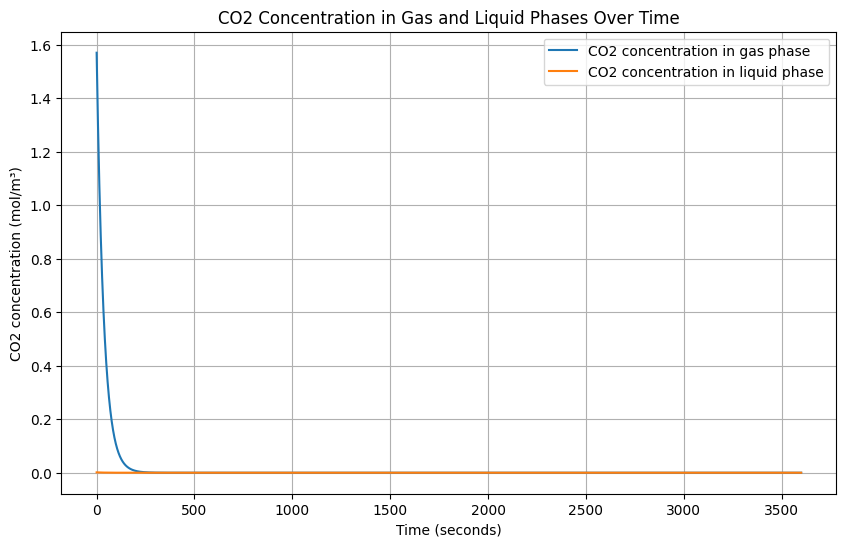

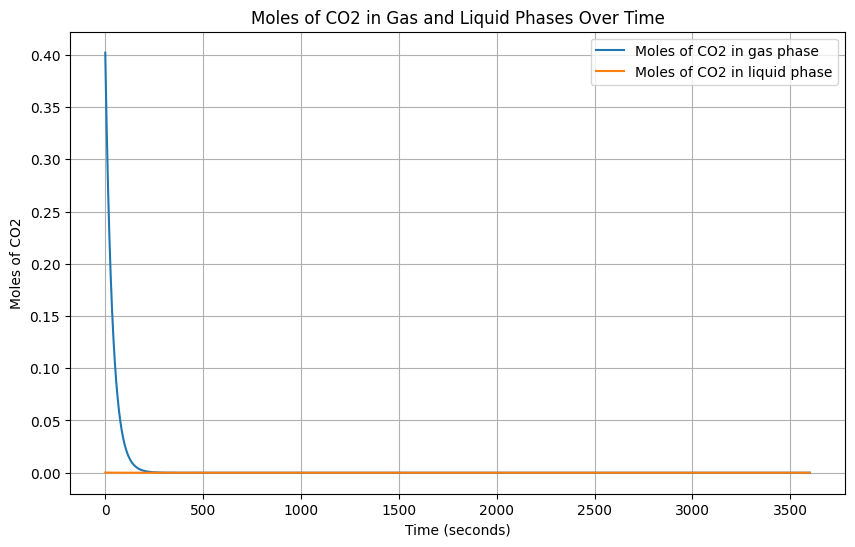

In [ ]:
#10 - more tinkering

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4e3  # Henry's Law constant for CO2 in water at 25°C, Pa·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Partial pressure of CO2 in the atmosphere (assuming 400 ppm or 0.0004 fractional concentration)
P_CO2_atm = 0.0004 * P_total

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law
C_l_initial = P_CO2_atm / H

# Initial concentration of CO2 in the gas phase
P_CO2 = fraction_CO2 * P_total
C_g_initial = P_CO2 / (R * T)

# Initial moles of CO2 in the gas phase
n_CO2_initial = C_g_initial * gas_volume

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = C_l_initial

# Calculate the equilibrium concentration in the liquid phase using Henry's Law
C_l_eq = P_CO2 / H

# Print initial concentrations
print(f"Initial concentration of CO2 in the gas phase: {C_g_initial:.6f} mol/m³")
print(f"Initial concentration of CO2 in the liquid phase: {C_l_initial:.6f} mol/m³")

# Euler method for numerical integration
for t in time_points:
    # Ensure mass balance: moles of CO2 in gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = liquid_volume * C_l

    # Calculate the equilibrium concentration in the liquid phase using Henry's Law
    C_l_eq = P_CO2 / H * C_g / (R * T)

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l_eq)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Update moles of CO2 in gas phase
    n_CO2_gas = C_g * gas_volume

    # Update the concentration of CO2 in the liquid phase
    C_l = n_CO2_liquid / liquid_volume

    # Calculate the rate of change of CO2 concentration in the liquid phase
    dC_l_dt = k * available_surface_area * (C_l_eq - C_l)

    # Update the concentration of CO2 in the liquid phase
    C_l += dC_l_dt * time_step

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)



# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g - C_l_eq)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the moles of CO2 in gas and liquid phases
plt.figure(figsize=(10, 6))
plt.plot(time_points, n_CO2_gas_values, label='Moles of CO2 in gas phase')
plt.plot(time_points, n_CO2_liquid_values, label='Moles of CO2 in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('Moles of CO2')
plt.title('Moles of CO2 in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


Initial concentration of CO2 in the gas phase: 1.613672 mol/m³
Initial concentration of CO2 in the liquid phase: 1.360544 mol/m³
Final concentration of CO2 in the gas phase: 1.485383 mol/m³
Final concentration of CO2 in the liquid phase: 1.485383 mol/m³
Final mass transfer rate of CO2 into the packed bed reactor: 0.000000 mol/s


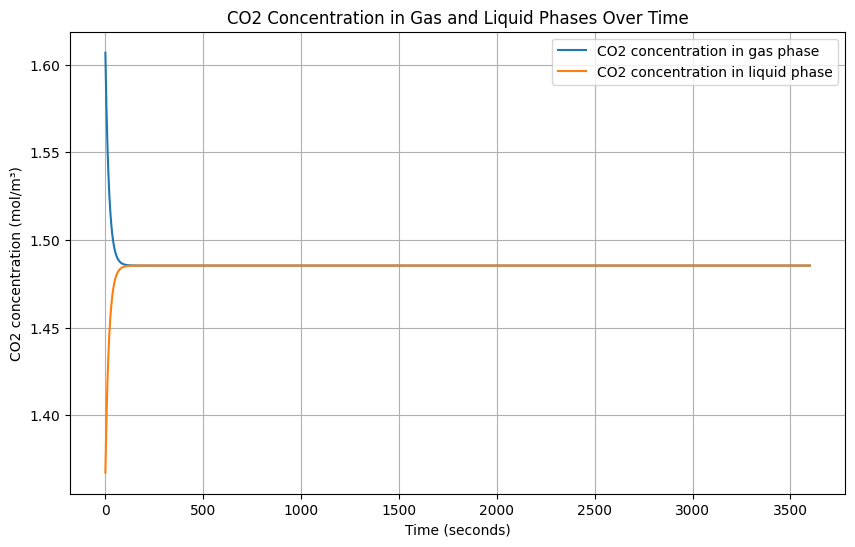

In [ ]:
#11 - new approach using Henry's law calculated equ point as break

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2 = 0.04  # 4% CO2
H = 29.4  # Henry's Law constant for CO2 in water at 25°C, Pa·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Partial pressure of CO2 in the atmosphere (assuming 400 ppm or 0.0004 fractional concentration)
P_CO2_atm = 0.0004 * P_total

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law
C_l_eq = P_CO2_atm / H

# Initial concentration of CO2 in the gas phase
P_CO2 = fraction_CO2 * P_total
C_g_initial = P_CO2 / (R * T)

# Time parameters for simulation
time_step = 1  # Time step in seconds
total_time = 3600  # Total simulation time in seconds (1 hour)

# Lists to store results
time_points = np.arange(0, total_time + time_step, time_step)
C_g_values = []
C_l_values = []
n_CO2_gas_values = []
n_CO2_liquid_values = []

# Initial concentrations and moles
C_g = C_g_initial
C_l = C_l_eq  # Start with the equilibrium concentration

# Print initial concentrations
print(f"Initial concentration of CO2 in the gas phase: {C_g_initial:.6f} mol/m³")
print(f"Initial concentration of CO2 in the liquid phase: {C_l_eq:.6f} mol/m³")

# Euler method for numerical integration
for t in time_points:
    # Ensure mass balance: moles of CO2 in gas and liquid phases
    n_CO2_gas = C_g * gas_volume
    n_CO2_liquid = liquid_volume * C_l

    # Calculate the rate of change of CO2 concentration in the gas phase
    dC_g_dt = -k * available_surface_area * (C_g - C_l)

    # Update the concentration of CO2 in the gas phase
    C_g += dC_g_dt * time_step

    # Update moles of CO2 in gas phase
    n_CO2_gas = C_g * gas_volume

    # Update the concentration of CO2 in the liquid phase
    C_l = n_CO2_liquid / liquid_volume

    # Calculate the rate of change of CO2 concentration in the liquid phase
    dC_l_dt = k * available_surface_area * (C_g - C_l)

    # Update the concentration of CO2 in the liquid phase
    C_l += dC_l_dt * time_step

    # Store values
    C_g_values.append(C_g)
    C_l_values.append(C_l)
    n_CO2_gas_values.append(n_CO2_gas)
    n_CO2_liquid_values.append(n_CO2_liquid)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g - C_l)
print(f"Final concentration of CO2 in the gas phase: {C_g:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l:.6f} mol/m³")
print(f"Final mass transfer rate of CO2 into the packed bed reactor: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#12 - new instructions on loop

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2_initial = 0.04  # Initial gas phase CO2 concentration
H = 29.4  # Henry's Law constant for CO2 in water at 25°C, atm·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial partial pressure of CO2 in the gas phase
P_CO2_initial = fraction_CO2_initial * P_total

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law
C_l_initial_eq = P_CO2_initial / H

# Initial concentration of CO2 in the gas phase
C_g_initial = P_CO2_initial / (R * T)

# Lists to store results
time_points = [0]  # Initial time
C_g_values = [C_g_initial]  # Initial gas phase CO2 concentration
C_l_values = [C_l_initial_eq]  # Initial liquid phase CO2 concentration
mass_transfer_rates = []  # Mass transfer rates
CO2_transferred = []  # CO2 transferred from gas to liquid phase

# Main loop
iteration = 0
while True:
    iteration += 1
    # Calculate mass transfer rate
    mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
    mass_transfer_rates.append(mass_transfer_rate)

    # Limit the time step to prevent large changes in concentrations
    time_step = min(1, 0.1 * gas_volume / abs(mass_transfer_rate))

    # Update concentrations in gas and liquid phases
    if mass_transfer_rate != 0:
        C_g_new = C_g_values[-1] - mass_transfer_rate * time_step / gas_volume
        C_l_new = C_l_values[-1] + mass_transfer_rate * time_step / liquid_volume
    else:
        C_g_new = C_g_values[-1]
        C_l_new = C_l_values[-1]

# Calculate new equilibrium concentration in the liquid phase considering the updated gas phase concentration
if C_g_new != 0:
    P_CO2_gas_new = C_g_new * R * T  # Calculate new partial pressure of CO2 in the gas phase
    C_l_eq_new = P_CO2_gas_new / H  # Calculate equilibrium concentration using updated partial pressure
else:
    C_l_eq_new = C_l_values[-1]


    # Check if the equilibrium concentration matches the concentration in the liquid phase
    if abs(C_l_new - C_l_eq_new) < 1e-6:  # Using a small tolerance for convergence
        break  # Break the loop if equilibrium is reached

    # Break if the liquid phase CO2 concentration exceeds the calculated solubility
    if C_l_new > C_l_eq_new:
        print("Liquid phase CO2 concentration exceeds solubility.")
        break

    # Print debug information
    print(f"Iteration {iteration}:")
    print(f"Time: {time_points[-1]} seconds")
    print(f"Time step: {time_step} seconds")
    print(f"Mass transfer rate: {mass_transfer_rate:.6f} mol/s")
    print(f"CO2 concentration in gas phase: {C_g_new:.6f} mol/m³")
    print(f"CO2 concentration in liquid phase: {C_l_new:.6f} mol/m³")
    print(f"Equilibrium concentration in liquid phase: {C_l_eq_new:.6f} mol/m³\n")

    # Update time and concentrations for the next iteration
    time_points.append(time_points[-1] + time_step)  # Increment time by the time step
    C_g_values.append(C_g_new)
    C_l_values.append(C_l_new)


# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
print(f"Final concentration of CO2 in the gas phase: {C_g_values[-1]:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l_values[-1]:.6f} mol/m³")
print(f"Final mass transfer rate: {final_mass_transfer_rate:.6f} mol/s")


# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [ ]:
#13 - new break loop

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2_initial = 0.04  # Initial gas phase CO2 concentration
H = 29.4  # Henry's Law constant for CO2 in water at 25°C, atm·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Function to calculate the equilibrium concentration of CO2 in the liquid phase based on the current partial pressure in the gas phase
def calculate_equilibrium_concentration(P_CO2_gas):
    return P_CO2_gas / H

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial partial pressure of CO2 in the gas phase
P_CO2_initial = fraction_CO2_initial * P_total

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law and standard CO2 concentration in air
C_l_initial_eq = P_total / H * 0.0004

# Initial concentration of CO2 in the gas phase
C_g_initial = P_CO2_initial / (R * T)

# Lists to store results
time_points = [0]  # Initial time
C_g_values = [C_g_initial]  # Initial gas phase CO2 concentration
C_l_values = [C_l_initial_eq]  # Initial liquid phase CO2 concentration
mass_transfer_rates = []  # Mass transfer rates
CO2_transferred = []  # CO2 transferred from gas to liquid phase

# Main loop
iteration = 0
while True:
    iteration += 1
    # Calculate mass transfer rate
    mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
    mass_transfer_rates.append(mass_transfer_rate)

    # Limit the time step to prevent large changes in concentrations
    time_step = min(1, 0.1 * gas_volume / abs(mass_transfer_rate))

    # Update concentrations in gas and liquid phases
    if mass_transfer_rate != 0:
        C_g_new = C_g_values[-1] - mass_transfer_rate * time_step / gas_volume
        # Limit the update of the liquid phase concentration to not exceed solubility
        C_l_new = min(C_l_values[-1] + mass_transfer_rate * time_step / liquid_volume, C_l_eq_new)
    else:
        C_g_new = C_g_values[-1]
        C_l_new = C_l_values[-1]

    # Calculate new equilibrium concentration in the liquid phase considering the updated gas phase concentration
    if C_g_new != 0:
        P_CO2_gas_new = C_g_new * R * T  # Calculate new partial pressure of CO2 in the gas phase
        C_l_eq_new = P_CO2_gas_new / H  # Calculate equilibrium concentration using updated partial pressure
    else:
        C_l_eq_new = C_l_values[-1]

    # Check if the equilibrium concentration matches the concentration in the liquid phase
    if abs(C_l_new - C_l_eq_new) < 1e-6:  # Using a small tolerance for convergence
        break  # Break the loop if equilibrium is reached

    # Break if the liquid phase CO2 concentration exceeds the calculated solubility
    if C_l_new > C_l_eq_new:
        print("Liquid phase CO2 concentration exceeds solubility.")
        break

    # Print debug information
    print(f"Iteration {iteration}:")
    print(f"Time: {time_points[-1]} seconds")
    print(f"Time step: {time_step} seconds")
    print(f"Mass transfer rate: {mass_transfer_rate:.6f} mol/s")
    print(f"CO2 concentration in gas phase: {C_g_new:.6f} mol/m³")
    print(f"CO2 concentration in liquid phase: {C_l_new:.6f} mol/m³")
    print(f"Equilibrium concentration in liquid phase: {C_l_eq_new:.6f} mol/m³\n")

    # Update time and concentrations for the next iteration
    time_points.append(time_points[-1] + time_step)  # Increment time by the time step
    C_g_values.append(C_g_new)
    C_l_values.append(C_l_new)


# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
print(f"Final concentration of CO2 in the gas phase: {C_g_values[-1]:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l_values[-1]:.6f} mol/m³")
print(f"Final mass transfer rate: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()





Streaming output truncated to the last 5000 lines.
Time: 3192 seconds
Time step: 1 seconds
Mass transfer rate: 0.000000 mol/s
CO2 concentration in gas phase: 1.522546 mol/m³
CO2 concentration in liquid phase: 1.522546 mol/m³
Equilibrium concentration in liquid phase: 128.371275 mol/m³

Iteration 3194:
Time: 3193 seconds
Time step: 1 seconds
Mass transfer rate: 0.000000 mol/s
CO2 concentration in gas phase: 1.522546 mol/m³
CO2 concentration in liquid phase: 1.522546 mol/m³
Equilibrium concentration in liquid phase: 128.371275 mol/m³

Iteration 3195:
Time: 3194 seconds
Time step: 1 seconds
Mass transfer rate: 0.000000 mol/s
CO2 concentration in gas phase: 1.522546 mol/m³
CO2 concentration in liquid phase: 1.522546 mol/m³
Equilibrium concentration in liquid phase: 128.371275 mol/m³

Iteration 3196:
Time: 3195 seconds
Time step: 1 seconds
Mass transfer rate: 0.000000 mol/s
CO2 concentration in gas phase: 1.522546 mol/m³
CO2 concentration in liquid phase: 1.522546 mol/m³
Equilibrium concent

KeyboardInterrupt: 

Iteration 1:
Time: 0 seconds
Time step: 1 seconds
Mass transfer rate: 0.006813 mol/s
CO2 concentration in gas phase: 1.587057 mol/m³
CO2 concentration in liquid phase: 1.407859 mol/m³
Equilibrium concentration in liquid phase: 133.810464 mol/m³

Iteration 2:
Time: 1 seconds
Time step: 1 seconds
Mass transfer rate: 0.004823 mol/s
CO2 concentration in gas phase: 1.568216 mol/m³
CO2 concentration in liquid phase: 1.441355 mol/m³
Equilibrium concentration in liquid phase: 132.221882 mol/m³

Iteration 3:
Time: 2 seconds
Time step: 1 seconds
Mass transfer rate: 0.003415 mol/s
CO2 concentration in gas phase: 1.554877 mol/m³
CO2 concentration in liquid phase: 1.465067 mol/m³
Equilibrium concentration in liquid phase: 131.097264 mol/m³

Iteration 4:
Time: 3 seconds
Time step: 1 seconds
Mass transfer rate: 0.002417 mol/s
CO2 concentration in gas phase: 1.545434 mol/m³
CO2 concentration in liquid phase: 1.481855 mol/m³
Equilibrium concentration in liquid phase: 130.301105 mol/m³

Iteration 5:
Tim

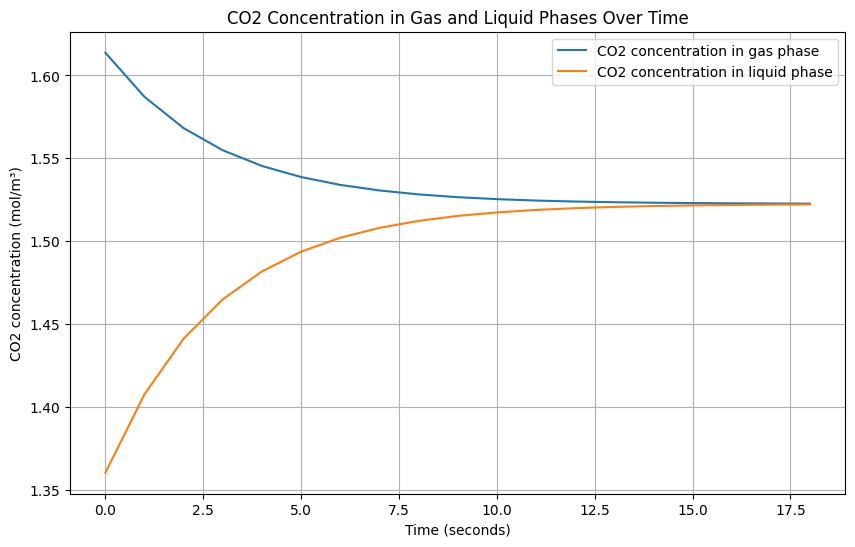

In [ ]:
#14 MT = 0 break

#13 - new break loop

import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 8.314  # Universal gas constant, J/(mol·K)
T = 298.15  # Temperature in Kelvin (25°C)
P_total = 1.0e5  # Total pressure in Pascals (1 atm)
fraction_CO2_initial = 0.04  # Initial gas phase CO2 concentration
H = 29.4  # Henry's Law constant for CO2 in water at 25°C, atm·m³/mol
k = 1e-4  # Mass transfer coefficient, m/s
hydration_level = 0.1  # 10%
rho_concrete = 2400  # Density of concrete, kg/m³
rho_water = 1000  # Density of water, kg/m³
wetting_coefficient = 0.8  # Wetting coefficient

# Function to calculate total surface area
def calculate_surface_area_normal_distribution(mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction, num_samples=100000):
    diameters = np.random.normal(loc=mean_diameter, scale=std_deviation, size=num_samples)
    diameters = diameters[(diameters >= min_diameter) & (diameters <= max_diameter)]
    radii = diameters / 2
    volumes = (4/3) * np.pi * (radii ** 3)
    total_particle_volume = reactor_volume * (1 - void_fraction)
    total_volume_of_sampled_particles = np.sum(volumes)
    scaling_factor = total_particle_volume / total_volume_of_sampled_particles
    surface_areas = 4 * np.pi * (radii ** 2)
    total_surface_area = np.sum(surface_areas * scaling_factor)
    return total_surface_area

# Function to calculate the equilibrium concentration of CO2 in the liquid phase based on the current partial pressure in the gas phase
#def calculate_equilibrium_concentration(P_CO2_gas):
#    return P_CO2_gas / H

# Example usage:
mean_diameter = 0.01  # Mean diameter of 1 cm in meters
std_deviation = 0.002  # Standard deviation of 0.2 cm in meters
min_diameter = 0.005  # Minimum diameter of 0.5 cm in meters
max_diameter = 0.015  # Maximum diameter of 1.5 cm in meters
reactor_volume = 1.0  # 1 cubic meter
void_fraction = 0.4  # 40% void fraction

total_surface_area = calculate_surface_area_normal_distribution(
    mean_diameter, std_deviation, min_diameter, max_diameter, reactor_volume, void_fraction
)

# Solid phase volume and mass
solid_volume = reactor_volume * (1 - void_fraction)
solid_mass = solid_volume * rho_concrete

# Liquid phase mass and volume
liquid_mass = hydration_level * solid_mass
liquid_volume = liquid_mass / rho_water

# Gas phase volume
gas_volume = reactor_volume - solid_volume - liquid_volume

# Available surface area for gas exchange
available_surface_area = total_surface_area * wetting_coefficient

# Initial partial pressure of CO2 in the gas phase
P_CO2_initial = fraction_CO2_initial * P_total

# Initial equilibrium concentration of CO2 in the liquid phase using Henry's Law and standard CO2 concentration in air
C_l_initial_eq = (P_total * 0.0004) / H

# Initial concentration of CO2 in the gas phase
C_g_initial = P_CO2_initial / (R * T)

# Lists to store results
time_points = [0]  # Initial time
C_g_values = [C_g_initial]  # Initial gas phase CO2 concentration
C_l_values = [C_l_initial_eq]  # Initial liquid phase CO2 concentration
mass_transfer_rates = []  # Mass transfer rates
CO2_transferred = []  # CO2 transferred from gas to liquid phase

# Main loop
iteration = 0
while True:
    iteration += 1
    # Calculate mass transfer rate
    mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
    mass_transfer_rates.append(mass_transfer_rate)

    # Limit the time step to prevent large changes in concentrations
    time_step = min(1, 0.1 * gas_volume / abs(mass_transfer_rate))

    # Update concentrations in gas and liquid phases
    if mass_transfer_rate != 0:
        C_g_new = C_g_values[-1] - mass_transfer_rate * time_step / gas_volume
        # Limit the update of the liquid phase concentration to not exceed solubility
        C_l_new = min(C_l_values[-1] + mass_transfer_rate * time_step / liquid_volume, C_l_eq_new)
    else:
        C_g_new = C_g_values[-1]
        C_l_new = C_l_values[-1]

    # Calculate new equilibrium concentration in the liquid phase considering the updated gas phase concentration
    if C_g_new != 0:
        P_CO2_gas_new = C_g_new * R * T  # Calculate new partial pressure of CO2 in the gas phase
        C_l_eq_new = P_CO2_gas_new / H  # Calculate equilibrium concentration using updated partial pressure
    else:
        C_l_eq_new = C_l_values[-1]

    # Check if the mass transfer rate is less than 0.001
    if abs(mass_transfer_rate) < 0.00001666666:
        print("Mass transfer rate is less than 1 mmol/minute. Breaking loop.")
        break

    # Check if the equilibrium concentration matches the concentration in the liquid phase
    if abs(C_l_new - C_l_eq_new) < 1e-6:  # Using a small tolerance for convergence
        break  # Break the loop if equilibrium is reached

    # Break if the liquid phase CO2 concentration exceeds the calculated solubility
    if C_l_new > C_l_eq_new:
        print("Liquid phase CO2 concentration exceeds solubility.")
        break

    # Print debug information
    print(f"Iteration {iteration}:")
    print(f"Time: {time_points[-1]} seconds")
    print(f"Time step: {time_step} seconds")
    print(f"Mass transfer rate: {mass_transfer_rate:.6f} mol/s")
    print(f"CO2 concentration in gas phase: {C_g_new:.6f} mol/m³")
    print(f"CO2 concentration in liquid phase: {C_l_new:.6f} mol/m³")
    print(f"Equilibrium concentration in liquid phase: {C_l_eq_new:.6f} mol/m³\n")

    # Update time and concentrations for the next iteration
    time_points.append(time_points[-1] + time_step)  # Increment time by the time step
    C_g_values.append(C_g_new)
    C_l_values.append(C_l_new)

# Print final concentrations and mass transfer rate at the end of the simulation
final_mass_transfer_rate = k * available_surface_area * (C_g_values[-1] - C_l_values[-1])
print(f"Final concentration of CO2 in the gas phase: {C_g_values[-1]:.6f} mol/m³")
print(f"Final concentration of CO2 in the liquid phase: {C_l_values[-1]:.6f} mol/m³")
print(f"Final mass transfer rate: {final_mass_transfer_rate:.6f} mol/s")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_points, C_g_values, label='CO2 concentration in gas phase')
plt.plot(time_points, C_l_values, label='CO2 concentration in liquid phase')
plt.xlabel('Time (seconds)')
plt.ylabel('CO2 concentration (mol/m³)')
plt.title('CO2 Concentration in Gas and Liquid Phases Over Time')
plt.legend()
plt.grid(True)
plt.show()





